# 计算机视觉学习笔记

内容：

- openCV Python

版本：

- python 3.7.3

- openCV 4.1.0.25

官方文档：

- [tutorial](https://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html)

知识点树：



## 0. 应用库的加载

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. 图像的读取，显示与写入

### 图像读取：

`cv2.imread()` 两个参数：

- 注意：路径如果不争确会报错，然后还是会输出None

- 图片路径

- 读片读取的方式

| Flag | 作用 | 简化为 |
| :-: | :-: | :-: |
| cv2.IMREAD_COLOR | 读入彩色区域，透明区域将被忽略 | 1 |
| cv2.IMREAD_GRAYSCALE | 读取成灰度图像 | 0 |
| cv2.IMREAD_UNCHANGED | 读取成彩色区域，包括alpha透明通道 | -1 |

### 图像显示

`cv2.imshow()`:

- 窗口自动适应图片大小

- 第一个参数是窗口名称，第二个参数是要显示的图像

`cv2.waitkey()`:

- 是一个与键盘动作相连的函数，参数是数字，单位是毫秒

- 作用是在特定的时间内等待键盘输入，当键盘输入任意键，程序继续

- 0代表等待时间为无穷，会一直等待键盘输入

`cv2.destroyAllWindows()`:

- 摧毁所有已创建的窗口

`cv2.destroyWindow()`:

- 摧毁某一窗口，参数是窗口名称

### 图像写入（保存）

`cv2.imwrite()` 两个参数：

- 要保存的文件名称

- 图片

### Example

读取灰度图片，按`Esc`键退出窗口，按`s`键保存

In [5]:
img = cv2.imread('img/example.jpg',0)
cv2.imshow('example',img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyWindow('example')
if k == ord('s'): #返回Unicode编码
    cv2.imwrite('img/example.png',img)
    cv2.destroyAllWindows()

Matplotlib 也可以显示图像，然而需要注意的是OpenCV是以BGR模式显示图像，而plt是以RGB模式显示图像

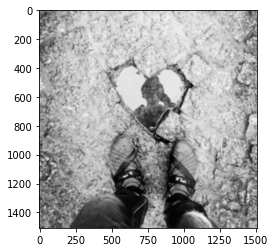

In [15]:
img = cv2.imread('img/example.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## 2. 视频的读取，抓取，显示和写入

### 利用相机获取视频

`cap = cv2.VideoCapture()`:

- 首先要创建一个`VideoCapture`对象，参数可以是设备（相机）索引，或者文件名，通常只有一个相机接入，所以参数可以选择0或-1，如果有第二个，第三个设备则可以选择1，2，3等等。接着就可以逐帧抓取视频了，当然最后要释放抓取的内容。

`ret, frame = cap.read()`:

- cap.read()按帧读取视频，ret,frame是获cap.read()方法的两个返回值。其中ret是布尔值，如果读取帧是正确的则返回True，如果文件读取到结尾，它的返回值就为False。frame是每一帧的图像，是个三维矩阵。

`cap.isOpened()`:

- 有的时候cap对象可能因为还没有初始化捕捉画面而报错，在这种情况下，可以通过cap.isOpened()判断是否初始化，如果已经初始化，会返回True，如果返回False可以用 cap.open()初始化。

`cap.get(propID)`：

- 获取video的特征信息，property从0-18

- 可以用`cap.set(propID,value)`改变某一特征的值，例如默认的宽高为640x480，修改为120x120

- cap.set(3,120)改变视频宽度；cap.set(4,120)改变视频高度

`k = cv2.waitkey()`:

- 参数是执行下一个语句前等待的时间，如果改为1000，帧与帧之间就会特别卡顿

### Example

利用相机捕获视频流，键入q退出

In [9]:
cap = cv2.VideoCapture(0)
w,h = cap.get(3),cap.get(4)
print(w,h)
cap.set(3,120)
cap.set(4,120)
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    k = cv2.waitKey(1) #如果改成0 就变成了空格下一帧
    if k == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

640.0 480.0


### 视频写入（保存）

首先要创建一个`VideoWriter()`的对象，包括5个参数：

1. 要保存的文件名称

2. FourCC编码

    - FourCC是一个4字节的编码，用来指定文件的编码器，对于不同的操作系统有不同的要求
    
    - FourCC是通过 `cv2.VideoWriter_fourcc('D','I','V','X')`传入的
    
    - 等效于 `cv2.VideoWriter_fourcc(*'DIVX')` 其中 `*` 解包并传入

| 系统 | FourCC | 说明 |
| :-: | :-: | :-: |
| Linux | DIVX, XVID, MJPG, X264, WMV1, WMV2 | XVID更为合适，MJPG会产生很大的文件 X264 会产生非常小的视频文件 |
| Windows | DIVX | 常用的编码类型 |
| OSX | 待补充 | 待补充 |

3. fps(frame per second) #每秒多少帧，正常选择25比较合适，过大会产生卡顿

4. (640,480) #帧的宽与高，结合为元组打包传入

5. colorflag，如果为True则输出为彩色图像，否则输出灰度图像

### Example

利用摄像头捕获图像，沿水平方向翻转（参数为1），若沿垂直方向翻转（参数为0），并写入文件，按q退出

In [12]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('example.avi',fourcc,20,(640,480),True)

while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,1)
    
        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

### 读取视频文件

- 与抓取类似，也要先创建`cv2.VideoCapture()`对象，参数是视频文件名，使用`cv2.waitkdy()`控制视频的播放速度，一般选择25，调整此参数可以达到快放或慢放的目的

- 整个流程与抓取文件相同

### Example

读取example.avi文件，转为灰度，并展示，设计成按q关闭，然而当视频结束后，`cap.isOpened()`返回False，就自动关闭了。

In [20]:
cap = cv2.VideoCapture('example.avi')
while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('example.avi',gray)
        k = cv2.waitKey(25)
        if k == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

## 3. 绘画函数工具

绘图工具包括：

- 线，圆，矩形，椭圆， 文本框

一些共同的参数：

| Arguments | Descrption |
| :-: | :-: |
| img | 想要绘制形状的区域 |
| color | 形状颜色，BGR，以元组传入，eg：(255,0,0) # blue；对于灰度，直接传入灰度数值 |
| thickness | 线或圆的边缘厚度，default = 1，如果设为-1，则会形成封闭图形 |
| lineType | 线型，default = 8-connected，cv2.LINE_AA 对曲线来说比较好 |

Drawing Line

- 在图片上画线需要输入起始点与终点坐标（coordinate n.坐标；adj.协调的）

Drawing Rectangle

- 与 line 相同，左上角与右下角，坐标为像素的行列坐标

Drawing Circle

- 需要圆心坐标和半径

Drawing Ellipse 8个参数：

- img

- 圆心坐标（像素横坐标，像素纵坐标）

- 轴长（横轴半径长，纵轴半径长）

- 偏转角度，逆时针偏转

- 椭圆图形显示区域的起始角度，顺时针

- 椭圆图形显示的终止角度，逆时针

- 边缘颜色（255，255，255）

- 线条粗细，与图形类型

Drawing Polygon

- 首先需要端点的坐标，组成的二维列表，第一个维度是角点，第二个维度是角点的坐标

- 数组类型是 np.int32

- 5个参数：

    - img
    
    - 端点坐标,用一个`[ ]`括起来，作为一个整体
    
    - True 封闭； False 开放
    
    - 颜色，（255，255，255）
    
    - 线条粗细
    
Drawing Text

- 首先要明确字体 `font = cv2.FONT_HERSHEY_SIMPLEX`

- 8个参数：

    - img
    
    - 文本，字符串类型
    
    - 左下角起点坐标
    
    - 字体
    
    - 字号大小
    
    - 颜色，(255,255,255)
    
    - 边缘粗细
    
    - 线型 推荐使用 `lineType = cv2.LINE_AA is recommended`

### Example

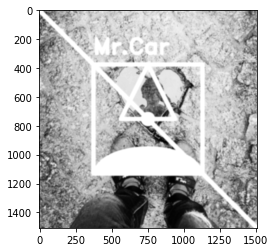

In [2]:
img = cv2.imread('img/example.jpg',0)
h,w = img.shape[:2]

# draw line
cv2.line(img,(0,0),(h,w),(255,255,255),30)

# draw rectangle
cv2.rectangle(img,(w//4,h//4),(h*3//4,w*3//4),(255,255,255),30)

# draw circle
cv2.circle(img,(w//2,h//2),50,(255,255,255),-1)

# draw ellipse
cv2.ellipse(img,(w//2,h*3//4),(w//4,h//8),0,180,360,(255,255,255),-1)

# draw polygon
p = np.array([[w//2,h//4],[w*3//8,h//2],[w*5//8,h//2]], np.int32)
cv2.polylines(img,[p],True,(255,255,255),30)

# draw Text
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img,'Mr.Car',(w//4,h//5), font, 5,(255,255,255),20,cv2.LINE_AA)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic' )
plt.show()

## 4. 鼠标绘图工具

### Example 1st

鼠标双击画圆：

- 首先要创建一个鼠标反馈函数，当鼠标动作发生后执行，鼠标动作包括很多，其中有键的按下，抬起，双击等等，鼠标动作返回鼠标动作点所在的坐标。

- 为了让所有鼠标动作都可以激活反馈函数，需要执行如下代码，形成了在`dir(cv2)`中的所有鼠标动作组成的列表，并打印：

cv2.setMouseCallback()：

In [4]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


创建鼠标反馈函数有具体的格式，如下：

- 定义主体函数（核心函数），5个参数：

    - event：事件
    
    - x：反馈的横坐标
    
    - y：反馈的纵坐标
    
    - flags：旗标
    
    - param：参数
    
- 创建窗口

- 将窗口与主体函数通过`cv2.setMouseCallback('窗口名称'，主体函数)`连接：

    - 一个函数装饰器

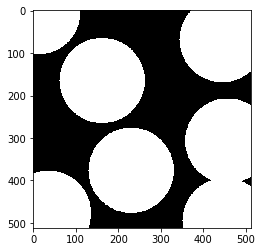

In [17]:
# mouse callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,255,255),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while True:
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
    cv2.imwrite('img/draw_circle.png',img) #实时保存
cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

### Example 2nd

实现一个可以鼠绘矩形与圆形的实例，选择模式后就可以通过拖动鼠标实现绘图，这个实例有助于理解像目标跟踪，图片分割等交互应用

In [42]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                #cv2.rectangle(img,(ix,iy),(x,y),(255,255,255),-1) #画填充的图形
                pass #画非填充的图形
            else:
                cv2.circle(img,(x,y),15,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(255,255,255),30)
        else:
            cv2.circle(img,(x,y),15,(0,0,0),-1)

接下来要创建窗口并将主函数与窗口绑定起来，同时也需要一个m键来切换绘制矩形与绘制圆形的模式

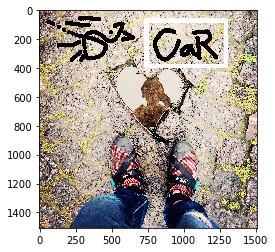

In [44]:
#img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('img/example.jpg',1)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
        
cv2.imwrite('img/draw_rectangular.png',img)
cv2.destroyAllWindows()
plt.imshow(img[:,:,::-1]) #反转BGR的方法，让plt.imshow()与cv2.imshow()显示相同
plt.show()